C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Acurácia do modelo SMOTE: 0.952984888741282
Relatório de Classificação SMOTE:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     24140
           1       0.96      0.94      0.95     24036

    accuracy                           0.95     48176
   macro avg       0.95      0.95      0.95     48176
weighted avg       0.95      0.95      0.95     48176



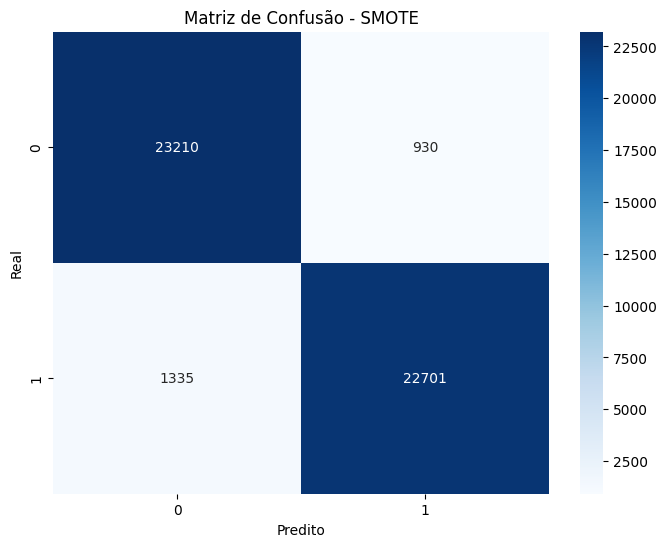

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

def remove_all_outliers(df, column):
    while True:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
        if df_filtered.shape[0] == df.shape[0]:
            break
        else:
            df = df_filtered
    
    return df_filtered

df = pd.read_csv("trabalho_dados_.csv")
df = remove_all_outliers(df, 'distance')
df = remove_all_outliers(df, 'delayed_day_time')

df = pd.get_dummies(df, columns=['customer_seller_is_same_state'], drop_first=True)

X = df[['product_weight_kg', 'product_volume_liters', 'review_score_avg', 'distance', 'due_time_shipped'] +
       [col for col in df.columns if col.startswith('customer_seller_is_same_state_')]]
y = df['due_time_delivered']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train_SMOTE = scaler.fit_transform(X_train_SMOTE)
X_test_SMOTE = scaler.transform(X_test_SMOTE)

rf = RandomForestClassifier(n_estimators=1000, random_state=42)

rf.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_SMOTE = rf.predict(X_test_SMOTE)

y_pred = rf.predict(X_test)

accuracy_SMOTE = accuracy_score(y_test_SMOTE, y_pred_SMOTE)
report_SMOTE = classification_report(y_test_SMOTE, y_pred_SMOTE)

print(f"Acurácia do modelo SMOTE: {accuracy_SMOTE}")
print("Relatório de Classificação SMOTE:")
print(report_SMOTE)

cm_SMOTE = confusion_matrix(y_test_SMOTE, y_pred_SMOTE)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_SMOTE, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Matriz de Confusão - SMOTE')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()